# Part II - (Ford GoBike System Data Exploration)
## by (Abdulmojeed  Adams)



## Investigation Overview

In this investigation, the focus was on understanding the relationship between the two users based on the times of the day the most rides are taken, the days the most rides are taken and the average distance of trips completed. Also to further check if their is any correlation between the ages of riders and distance covered.


## Dataset Overview

This dataset originally contains information about 183,412 gobike rides in the San Francisco Bay area with 16 attributes, detailing the times of rental and return, names of rental station and return, and information about the riders borrowing the bikes.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
gobike = pd.read_csv('fordgobike.csv')

In [19]:
#convert the start_time and end_time columns to datetime datatype
gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])

#drop null values in start_station_id
gobike.dropna(subset='start_station_id', inplace=True)

In [20]:
#funtion to label x and y axis and plot titles
def label(x, y, title):
    """
    x(str): x-axis title
    y(str): y-axis title
    title: Plot main title
    
    Returns: None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title, pad=20);

## Distribution of the two types of users

There are two types of users, Subscribers and Customers. The Subscribers are the majority with about 90% while Customers make up the rest with just 10%.

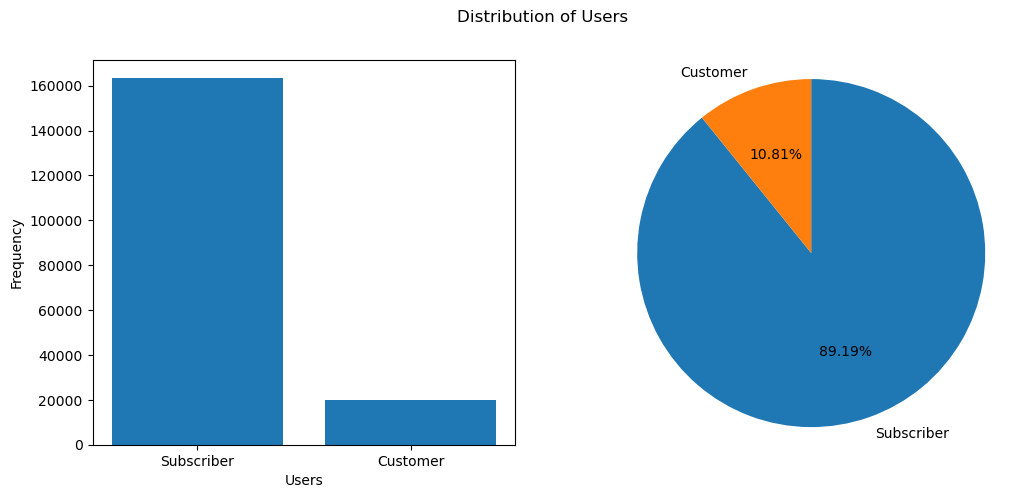

In [21]:
user = gobike['user_type'].value_counts()

plt.figure(figsize=[12,5])

plt.subplot(1,2,1)
plt.bar(user.index, user.values)
label('Users', 'Frequency', '')
plt.suptitle('Distribution of Users');

plt.subplot(1,2,2)
plt.pie(user, labels = user.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square');

## Time of day distribution of rides taken

The times of day were classified into Late Night(hours 0:00 - 3:59), Early Morning (4:00 - 7:59), Morning (8:00 - 11:59), Afternoon (12:00 - 15:59), Evening (16:00 - 19:59) and Night(20:00 - 23:59). Most trips are taken at Evenings then followed by Mornings and Afternoon. The least time for rides taken is Late Nights. 

In [22]:
#extracting hours from the start time column
hour = gobike['start_time'].dt.hour

#creating the time of day attribute from the start time column using pd.cut
gobike.loc[:, 'time_of_day'] = pd.cut(x=hour, bins=[0, 4, 8, 12, 16, 20, 24], labels=['Late Night', 'Early Morning', 
                                                                              'Morning', 'Afternoon', 'Evening', 'Night'],
                              right=False)

#converting the datatype of time_of_day into an ordered category
tod = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
classes = pd.api.types.CategoricalDtype(ordered=True, categories=tod)
gobike['time_of_day'] = gobike['time_of_day'].astype(classes)

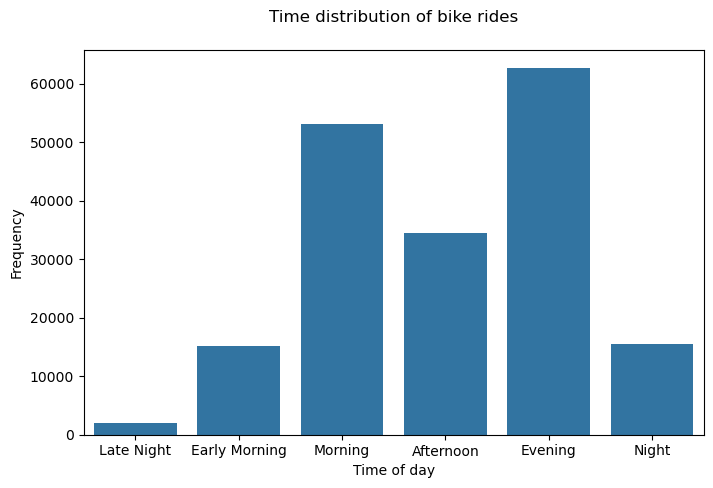

In [23]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
sb.countplot(data=gobike, x='time_of_day', color=base_color)
label('Time of day', 'Frequency', 'Time distribution of bike rides');

## Day of the week distribution of rides taken

From observation, the most rides are taken on weekdays with weekend numbers relatively small compared to rides taken in the week. Thursdays are the days with the most rides taken followed closely by Tuesday and Wednesday.


In [24]:
#extracting day of week from start time column
gobike.loc[:,'day_of_week'] = gobike['start_time'].dt.day_name()

#converting the datatype of day_of_week into an ordered category
dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
classes = pd.api.types.CategoricalDtype(ordered=True, categories=dow)
gobike['day_of_week'] = gobike['day_of_week'].astype(classes)

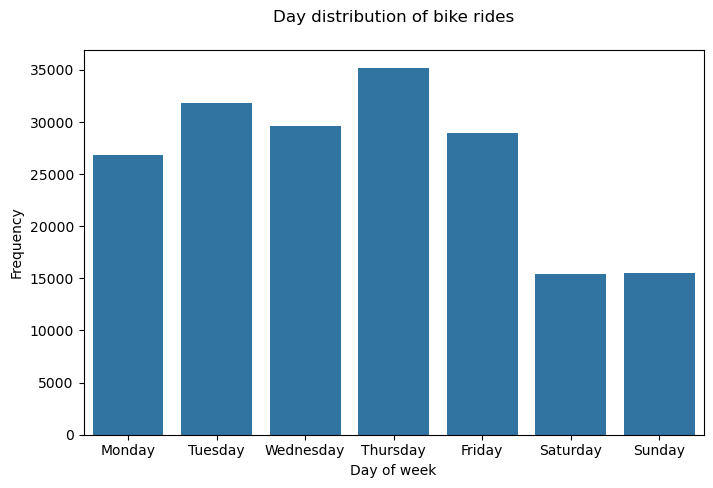

In [25]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
sb.countplot(data=gobike, x='day_of_week', color=base_color)
label('Day of week', 'Frequency', 'Day distribution of bike rides');

## Average distance of trips covered by both users

Although the most rides were taken by Subscribers, Customers completed the longest rides on the average. Customers averaged a distance of about 1.85km while Subscribers averaged about 1.6km.

In [26]:
#Defining a function to convert latitude and longitude coordinates to kilometres using geopy library
import geopy.distance
def distance(coords1, coords2):
    return round(geopy.distance.geodesic(coords1, coords2).km, 2)

#Creating a new column Distance that tells the distance travelled for each trip

gobike['distance'] = gobike.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), 
                                                       (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

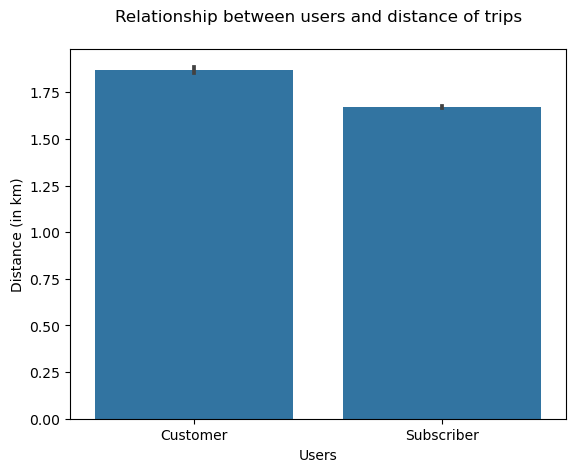

In [27]:
sb.barplot(data=gobike, x='user_type', y='distance', color=base_color)
label('Users', 'Distance (in km)', 'Relationship between users and distance of trips');

## Relationship between age and distance of trips covered

I wanted to find out if there was any correlation between the ages of riders and the distance covered. There was no correlation between them.

In [28]:
#dropping the null values in the birth year column
gobike.dropna(subset='member_birth_year', inplace=True)

# Changing the datatype for birh year column to integer
gobike['member_birth_year'] = gobike['member_birth_year'].astype(int)

#Creating a new column for age from birth year
for i in gobike['member_birth_year']:
    gobike['member_age'] = 2019 - gobike['member_birth_year']

In [29]:
#dropping riders with age over 95 **the outliers
gobike = gobike.query('member_age <95')

In [30]:
#dropping the outliers of the duration of trips
gobike = gobike.query('duration_sec < 1400')

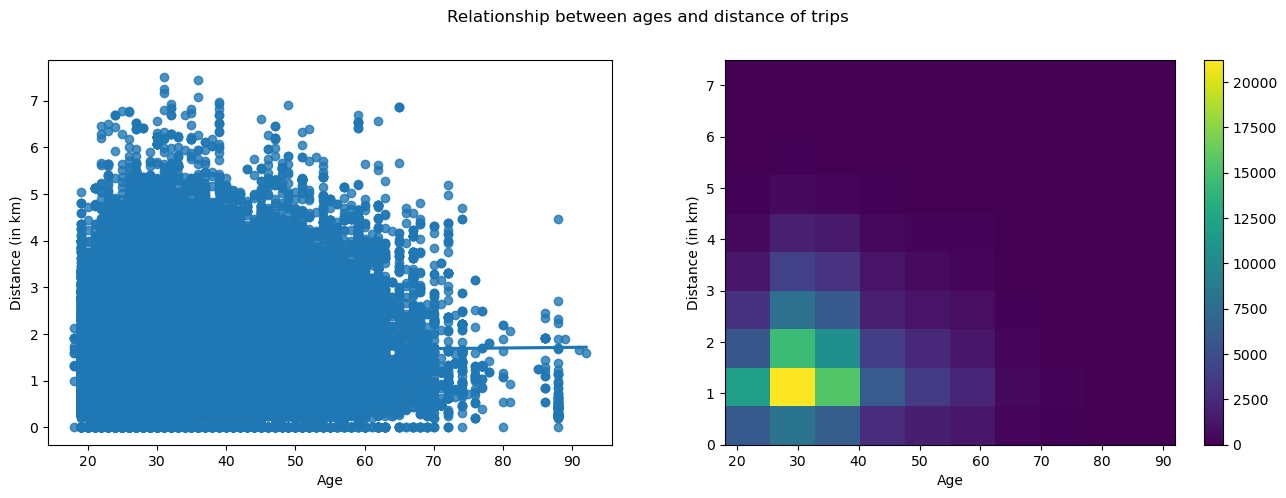

In [31]:
plt.figure(figsize = [16, 5])
plt.suptitle('Relationship between ages and distance of trips')

#figure1
plt.subplot(1,2,1)
sb.regplot(data = gobike, x = 'member_age', y = 'distance')
label('Age', 'Distance (in km)', '');

#figure2
plt.subplot(1,2,2)
plt.hist2d(data = gobike, x = 'member_age', y = 'distance')
plt.colorbar()
label('Age', 'Distance (in km)', '');

In [16]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 845948 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\majid\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\majid\anaconda3\lib\site-packages\jupyter_core\application.py", line 269, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\majid\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\majid\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\majid\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\Users\majid\